In [1]:
import pandas as pd , scipy, numpy as np #import the required libraries
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
#from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split,KFold
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN, GRU 
from keras.layers.core import Dropout, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D, Convolution2D, MaxPooling2D
from keras import layers
import keras
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [2]:
data=pd.read_csv( "dataset_sdn.csv")# create dataframe
pd.options.display.max_columns = None
data=data.loc[:,'switch':'label']#slicing through columns of dataset
data=data.loc[:,'switch':'label']#slicing through columns of dataset
data = data[data['pktrate'] !=0]#dropping rows  
data['src'] = [int(i.split('.')[3]) for i in data['src']]#extracting the last two digits 
data['dst'] = [int(i.split('.')[3])for i in data['dst']]#extracting the last two digits
data = data.sort_values(by ='switch' ) #rearranging data as per switch id
data['switch'] = data['switch'].astype(str) 
data['src'] = data['src'].astype(str)
data['dst'] = data['dst'].astype(str)
data['port_no'] = data['port_no'].astype(str)
data['Protocol'] = data['Protocol'].astype(str)
data_order = pd.get_dummies(data,columns = ['switch','src','Protocol','dst','port_no'])
data_order=data_order.drop(['port_no_5','switch_10','src_20','dst_17'],axis = 'columns')
cols_to_norm = ['pktcount','bytecount','dur','dur_nsec','tot_dur','packetins','pktperflow','byteperflow','pktrate','flows','tx_bytes','rx_bytes','tx_kbps','rx_kbps','tot_kbps']
data_order[cols_to_norm]=(data_order[cols_to_norm]-data_order[cols_to_norm].min())/(data_order[cols_to_norm].max()-data_order[cols_to_norm].min())
data_order.fillna(data_order.mean(), inplace=True)
x=data_order.drop(['label'],axis=1)
y=data_order.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
data_order

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,switch_1,switch_2,switch_3,switch_4,switch_5,switch_6,switch_7,switch_8,switch_9,src_1,src_10,src_11,src_12,src_13,src_14,src_15,src_16,src_17,src_18,src_2,src_3,src_4,src_5,src_6,src_7,src_8,src_9,Protocol_ICMP,Protocol_TCP,Protocol_UDP,dst_1,dst_10,dst_11,dst_12,dst_13,dst_14,dst_15,dst_16,dst_18,dst_2,dst_3,dst_4,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4
0,0.174214,0.328241,0.054915,0.716717,0.055495,0.066667,0.076883,0.962331,0.996744,0.962430,0,0.113329,0.000003,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
19468,0.116232,0.219016,0.036793,0.129129,0.036884,0.000000,0.312847,0.961572,0.995991,0.961631,0,0.000002,0.178031,0.000000,0.231526,0.186492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
19469,0.116232,0.219016,0.036793,0.129129,0.036884,0.000000,0.312847,0.961572,0.995991,0.961631,0,0.000002,0.459225,0.000000,0.231526,0.186492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
19470,0.116232,0.219016,0.036793,0.129129,0.036884,0.000000,0.312847,0.961572,0.995991,0.961631,0,0.025555,0.279444,0.186492,0.000000,0.186492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
19471,0.116232,0.219016,0.036793,0.129129,0.036884,0.000000,0.312847,0.961572,0.995991,0.961631,0,0.000002,0.366570,0.000000,0.325451,0.262148,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73005,0.200225,0.019104,0.108731,0.289289,0.108791,0.200000,1.000000,0.929484,0.910226,0.929456,1,0.004381,0.006439,0.011953,0.015986,0.024830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
73004,0.200225,0.019104,0.108731,0.289289,0.108791,0.200000,1.000000,0.929484,0.910226,0.929456,1,0.002330,0.002603,0.006414,0.007420,0.012391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
73003,0.224453,0.023003,0.116969,0.602603,0.117582,0.200000,1.000000,0.929484,0.910439,0.929456,1,0.002696,0.003014,0.006414,0.007420,0.012391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
73001,0.224453,0.023003,0.116969,0.602603,0.117582,0.200000,1.000000,0.929484,0.910439,0.929456,1,0.002330,0.002603,0.006414,0.007420,0.012391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
# split into input (X) and output (Y) variables, splitting csv data
x = data_order.drop('label',axis=1)
y = data_order.label
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
x_train=x_train.reshape(60807, 67,1)
x_test=x_test.reshape(15202, 67,1)

<font size='5'>LOGISTIC REGRESSION</font>

Text(0, 0.5, 'Predicted')

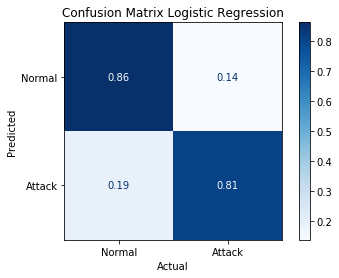

In [44]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
y_pred_l = lr.decision_function(x_test)
class_names=['Normal','Attack']
#print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(lr, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_l,fp_l,fn_l,tn_l = confusion_matrix(y_test, y_pred).ravel()
acc_l=(tp_l+tn_l)/(tp_l+fp_l+fn_l+tn_l)
rec_l=tp_l/(tp_l+fn_l)
rec_la=tn_l/(tn_l+fp_l)
pre_l=tp_l/(tp_l+fp_l)
pre_la=tn_l/(tn_l+fn_l)
fpr_l=fp_l/(fp_l+tn_l)
fnr_l=fn_l/(fn_l+tp_l)
f_l=2*pre_l*rec_l/(pre_l+rec_l)
f_la=2*pre_la*rec_la/(pre_la+rec_la)

data1=['LR',acc_l, pre_l, pre_la, rec_l, rec_la, f_l, f_la, fpr_l, fnr_l]

plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

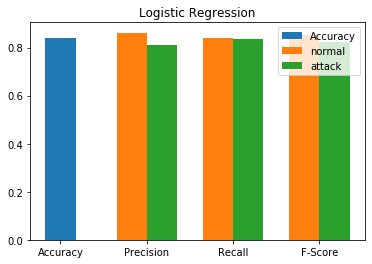

In [45]:
normal = {}
#normal['Accuracy'] = acc_l
normal['Precision'] = pre_l
normal['Recall'] = rec_l
normal['F-Score'] = f_l

labels = ['Accuracy','Precision','Recall','F-Score']

attack = {}
#attack['Accuracy'] = acc_l
attack['Precision'] = pre_la
attack['Recall'] = rec_la
attack['F-Score'] = f_la

height1= list(normal.values())
height2= list(attack.values())

plt.bar(0.35/2, acc_l, label='Accuracy', width=bar_width)
plt.bar(index, height1, label='normal', width=bar_width)
plt.bar(index+bar_width, height2, label='attack', width=bar_width)
plt.xticks(yoo+bar_width/2, labels)
plt.title('Logistic Regression')
plt.legend()
plt.show()

<font size='5'>SVM</font>

Text(0, 0.5, 'Predicted')

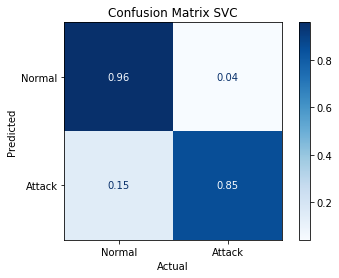

In [46]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_ped = svc.predict(x_test)
y_pred_s = svc.decision_function(x_test)
#print(confusion_matrix(y_test, y_ped))
print(plot_confusion_matrix(svc, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_s,fp_s,fn_s,tn_s = confusion_matrix(y_test, y_ped).ravel()
acc_s=(tp_s+tn_s)/(tp_s+fp_s+fn_s+tn_s)
rec_s=tp_s/(tp_s+fn_s)
pre_s=tp_s/(tp_s+fp_s)
fpr_s=fp_s/(fp_s+tn_s)
fnr_s=fn_s/(fn_s+tp_s)
f_s=2*pre_s*rec_s/(pre_s+rec_s)

pre_sa=tn_s/(tn_s+fn_s)
rec_sa=tn_s/(tn_s+fp_s)
f_sa=2*pre_sa*rec_sa/(pre_sa+rec_sa)

data2=['SVC',acc_s, pre_s, pre_sa, rec_s, rec_sa, f_s, f_sa, fpr_s, fnr_s]
plt.title('Confusion Matrix SVC')
plt.xlabel('Actual')
plt.ylabel('Predicted')

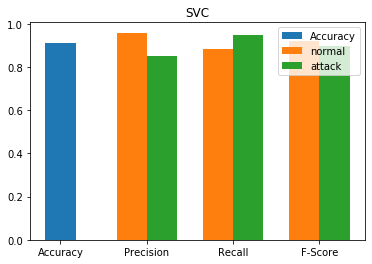

In [47]:
normal1 = {}
#normal1['Accuracy'] = acc_s
normal1['Precision'] = pre_s
normal1['Recall'] = rec_s
normal1['F-Score'] = f_s
attack1 = {}
#attack1['Accuracy'] = acc_s
attack1['Precision'] = pre_sa
attack1['Recall'] = rec_sa
attack1['F-Score'] = f_sa
height3= list(normal1.values())
height4= list(attack1.values())

plt.bar(0.35/2, acc_s, label='Accuracy', width=bar_width)
plt.bar(index, height3, label='normal', width=bar_width)
plt.bar(index+bar_width, height4, label='attack', width=bar_width)
plt.xticks(yoo+bar_width/2, labels)
plt.title('SVC')
plt.legend()
plt.show()

<font size='5'>RANDOM FOREST CLASSIFIER</font>

Text(0, 0.5, 'Predicted')

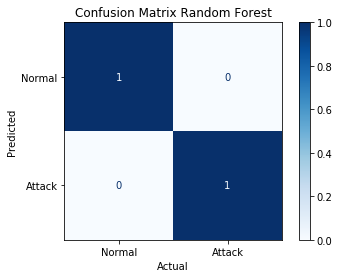

In [48]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train) 
y_prd = rf.predict(x_test)
#y_pred_r = rf.decision_function(x_test)
#print(confusion_matrix(y_test, y_prd))
print(plot_confusion_matrix(rf, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_r,fp_r,fn_r,tn_r = confusion_matrix(y_test, y_prd).ravel()
acc_r=(tp_r+tn_r)/(tp_r+fp_r+fn_r+tn_r)
rec_r=tp_r/(tp_r+fn_r)
pre_r=tp_r/(tp_r+fp_r)
fpr_r=fp_r/(fp_r+tn_r)
fnr_r=fn_r/(fn_r+tp_r)
f_r=2*pre_r*rec_r/(pre_r+rec_r)

pre_ra=tn_r/(tn_r+fn_r)
rec_ra=tn_r/(tn_r+fp_r)
f_ra=2*pre_ra*rec_ra/(pre_ra+rec_ra)
data3=['RF',acc_r, pre_r, pre_ra, rec_r, rec_ra, f_r, f_ra, fpr_r, fnr_r]

plt.title('Confusion Matrix Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

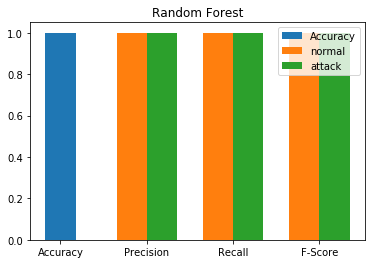

In [49]:
plt.title('Random Forest')
normal3 = {}
#normal3['Accuracy'] = acc_r
normal3['Precision'] = pre_r
normal3['Recall'] = rec_r
normal3['F-Score'] = f_r

attack3 = {}
#attack3['Accuracy'] = acc_r
attack3['Precision'] = pre_ra
attack3['Recall'] = rec_ra
attack3['F-Score'] = f_ra
height5= list(normal3.values())
height6= list(attack3.values())
plt.bar(0.35/2, acc_r, label='Accuracy', width=bar_width)
plt.bar(index, height5, label='normal', width=bar_width)
plt.bar(index+bar_width, height6, label='attack', width=bar_width)
plt.xticks(yoo+bar_width/2, labels)
plt.legend()
plt.show()

<font size='5'>K-Nearest Neighbours</font>

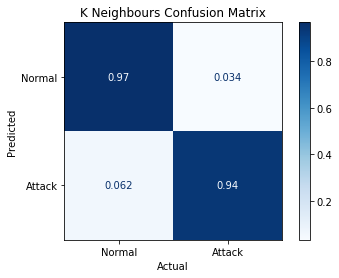

In [50]:
#knn
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(x_train, y_train) 
pre = knn.predict(x_test)
#y_pred_k = knn.decision_function(x_test)
#print(confusion_matrix(y_test, pre))
#d=knn.score(x_test, y_test)
print(plot_confusion_matrix(knn, x_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
tp_k,fp_k,fn_k,tn_k = confusion_matrix(y_test, pre).ravel()
acc_k=(tp_k+tn_k)/(tp_k+fp_k+fn_k+tn_k)
rec_k=tp_k/(tp_k+fn_k)
pre_k=tp_k/(tp_k+fp_k)
fpr_k=fp_k/(fp_k+tn_k)
fnr_k=fn_k/(fn_k+tp_k)
f_k=2*pre_k*rec_k/(pre_k+rec_k)

pre_ka=tn_k/(tn_k+fn_k)
rec_ka=tn_k/(tn_k+fp_k)
f_ka=2*pre_ka*rec_ka/(pre_ka+rec_ka)
plt.title('K Neighbours Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
data4=['KNN',acc_k, pre_k, pre_ka, rec_k, rec_ka, f_k, f_ka, fpr_k, fnr_k]

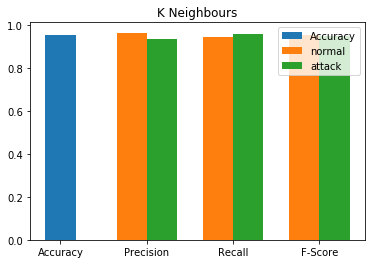

In [51]:
normal4 = {}
#normal4['Accuracy'] = acc_k
normal4['Precision'] = pre_k
normal4['Recall'] = rec_k
normal4['F-Score'] = f_k
attack4 = {}
#attack4['Accuracy'] = acc_k
attack4['Precision'] = pre_ka
attack4['Recall'] = rec_ka
attack4['F-Score'] = f_ka

height7= list(normal4.values())
height8= list(attack4.values())
plt.bar(0.35/2, acc_k, label='Accuracy', width=bar_width)
plt.bar(index, height7, label='normal', width=bar_width)
plt.bar(index+bar_width, height8, label='attack', width=bar_width)
plt.xticks(yoo+bar_width/2, labels)
plt.title('K Neighbours')
plt.legend()
plt.show()

In [52]:
print('N:Normal ')
print('A:Attack')
headers = ('ML_DL ','Acc','N Prec','A Prec','N Rec','A Rec','N F-score','A F-score','FPR','FNR')

data = [data1, data2, data3, data4, data5, data6,data7]
print(tabulate(data, headers=headers, tablefmt='grid'))
#plt.table(cellText=data, rowLabels=rows, colLabels=coulmns,loc='best')
#plt.show()

N:Normal 
A:Attack
+----------+----------+----------+----------+----------+----------+-------------+-------------+------------+-------------+
| ML_DL    |      Acc |   N Prec |   A Prec |    N Rec |    A Rec |   N F-score |   A F-score |        FPR |         FNR |
+==========+==========+==========+==========+==========+==========+=============+=============+============+=============+
| LR       | 0.838048 | 0.861747 | 0.810803 | 0.839645 | 0.836104 |    0.850552 |    0.823259 | 0.163896   | 0.160355    |
+----------+----------+----------+----------+----------+----------+-------------+-------------+------------+-------------+
| SVC      | 0.909946 | 0.959779 | 0.852658 | 0.882193 | 0.948561 |    0.919352 |    0.898056 | 0.0514394  | 0.117807    |
+----------+----------+----------+----------+----------+----------+-------------+-------------+------------+-------------+
| RF       | 1        | 1        | 1        | 1        | 1        |    1        |    1        | 0          | 0          

<font size='5'>ROC CURVE</font>

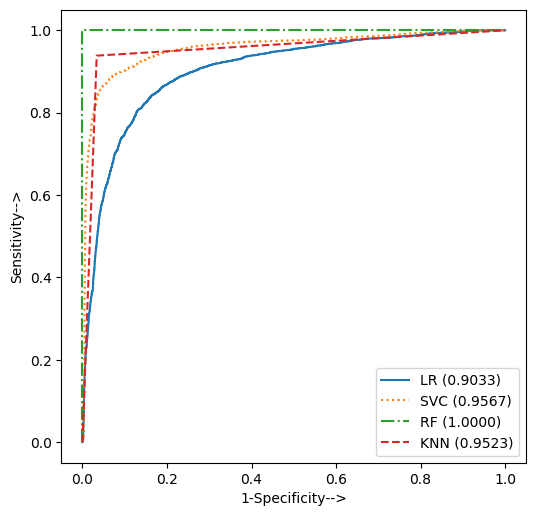

In [53]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_l)
s_fpr, s_tpr, threshold2 = roc_curve(y_test, y_pred_s)
#r_fpr, r_tpr, threshold3 = roc_curve(y_test, y_pred_r)
#k_fpr, k_tpr, threshold4 = roc_curve(y_test, y_pred_k)
k_fpr, k_tpr, threshold4 = roc_curve(y_test, pre)
r_fpr, r_tpr, threshold3 = roc_curve(y_test, y_prd)

auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_r = auc(r_fpr, r_tpr)
auc_k = auc(k_fpr, k_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(r_fpr, r_tpr, linestyle='-.', label='RF (%.4f)' %auc_r)
plt.plot(k_fpr, k_tpr, linestyle='--', label='KNN (%.4f)' %auc_k)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()

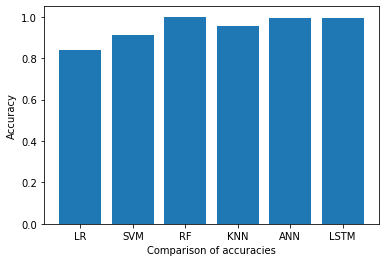

In [55]:
import numpy as np
%matplotlib inline
data1=[acc_l]
data2=[acc_s]
data3=[acc_r]
data4=[acc_k]
data5=[acc_a]
data6=[acc_ls]
data = [acc_l,acc_s,acc_r,acc_k,acc_a,acc_ls]
algos=['LR','SVM','RF','KNN','ANN','LSTM']
xpos=np.arange(len(algos))
plt.xticks(xpos,algos)
plt.bar(algos,data)
plt.xlabel('Comparison of accuracies')
plt.ylabel('Accuracy')
plt.show()

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv( "sdn.csv")# create dataframe
pd.options.display.max_columns = None
data=data.loc[:,'switch':'label']#slicing through columns of dataset
data=data.loc[:,'switch':'label']#slicing through columns of dataset
data = data[data['pktrate'] !=0]#dropping rows  
data['src'] = [int(i.split('.')[3]) for i in data['src']]#extracting the last two digits 
data['dst'] = [int(i.split('.')[3])for i in data['dst']]#extracting the last two digits
data = data.sort_values(by ='switch' ) #rearranging data as per switch id
data['switch'] = data['switch'].astype(str) 
data['src'] = data['src'].astype(str)
data['dst'] = data['dst'].astype(str)
data['port_no'] = data['port_no'].astype(str)
data['Protocol'] = data['Protocol'].astype(str)
data_order = pd.get_dummies(data,columns = ['switch','src','Protocol','dst','port_no'])
data_order=data_order.drop(['port_no_5','switch_10','src_20','dst_17'],axis = 'columns')
cols_to_norm = ['pktcount','bytecount','dur','dur_nsec','tot_dur','packetins','pktperflow','byteperflow','pktrate','flows','tx_bytes','rx_bytes','tx_kbps','rx_kbps','tot_kbps']
data_order[cols_to_norm]=(data_order[cols_to_norm]-data_order[cols_to_norm].min())/(data_order[cols_to_norm].max()-data_order[cols_to_norm].min())
data_order.fillna(data_order.mean(), inplace=True)
x=list()
y=list()
for i in data_order.label:
    if i==1:
       x.append(i)
    elif i==0:
       y.append(i) 


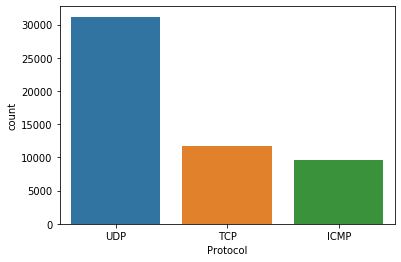

In [57]:
b=sns.countplot(data.Protocol)
plt.show()